# Telco Customer Churn Prediction - In Depth Project

In [1]:
#pip install --user pandas seaborn


In [2]:
import pandas as pd
df = pd.read_excel("C:/Users/gurio/Downloads/Telco Customer Churn Dataset/WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

C:\Users\gurio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
print(df.info())

print(df['Churn'].value_counts())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Initial Exploratory Data Analysis (EDA)

In [4]:
# 1. Inspect the data
print(df.head())
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
# 2. Check for missing values
print(df.isnull().sum())



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# 3. Check target distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))



Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [7]:
# 4. Summary stats
print(df.describe())
print(df.describe(include='object'))  # for categorical


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3          

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


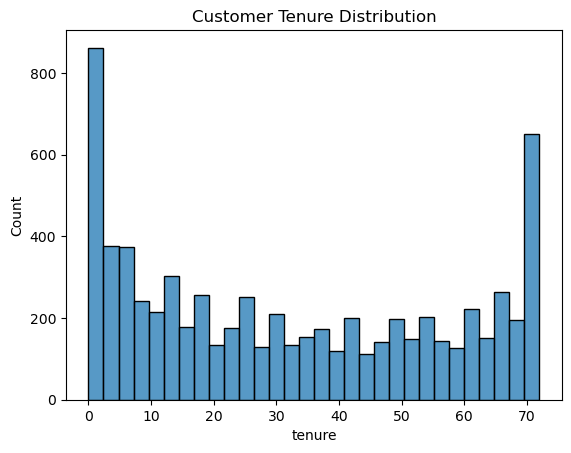

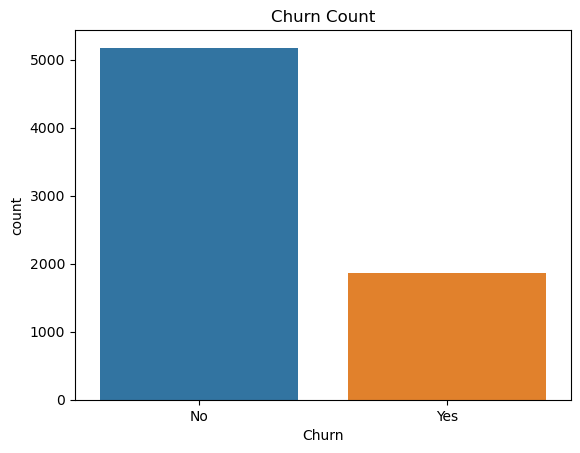

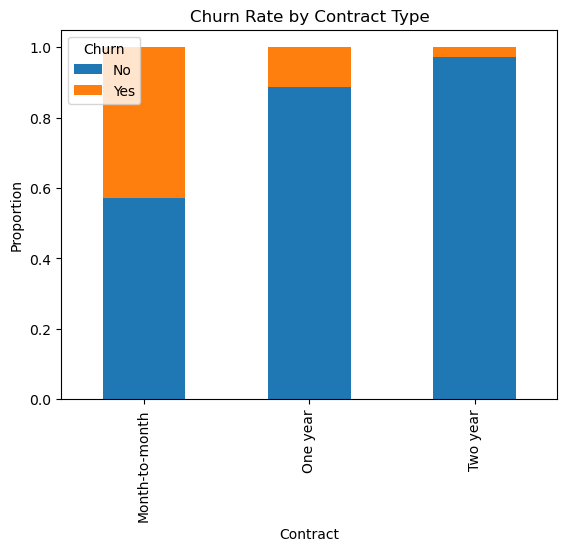

In [8]:

# 5. Basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of tenure
sns.histplot(df['tenure'], kde=False, bins=30)
plt.title('Customer Tenure Distribution')
plt.show()

# Churn count plot
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

# Churn rate by Contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.show()


C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

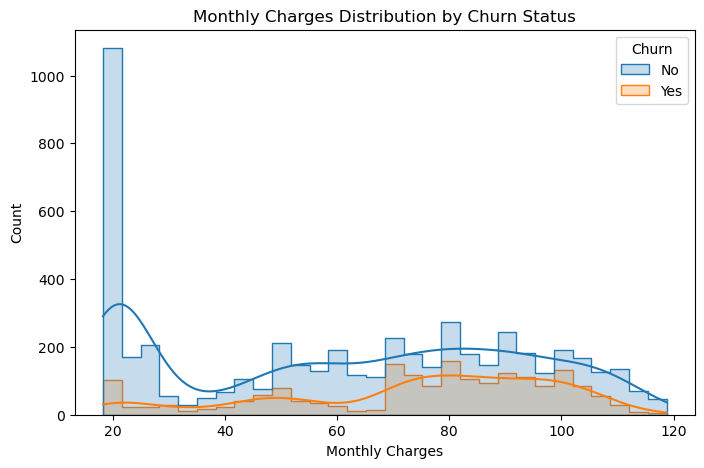

In [9]:
# Monthly charges distribution by Churn


plt.figure(figsize=(8,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, element='step')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


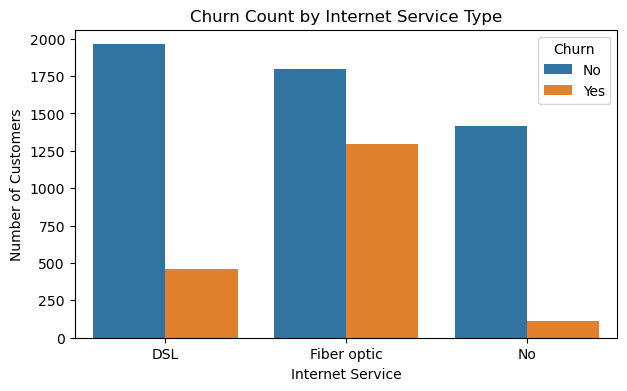

In [10]:
# Churn rate by Internet Service Type

plt.figure(figsize=(7,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()


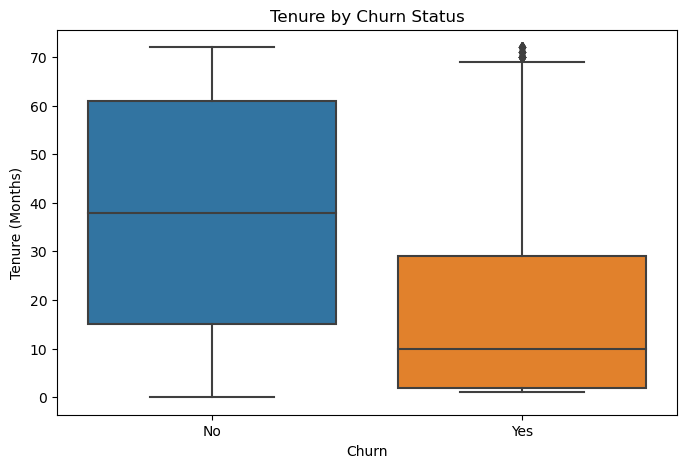

In [11]:
# Boxplot:Tenure by Churn

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()


<Figure size 800x400 with 0 Axes>

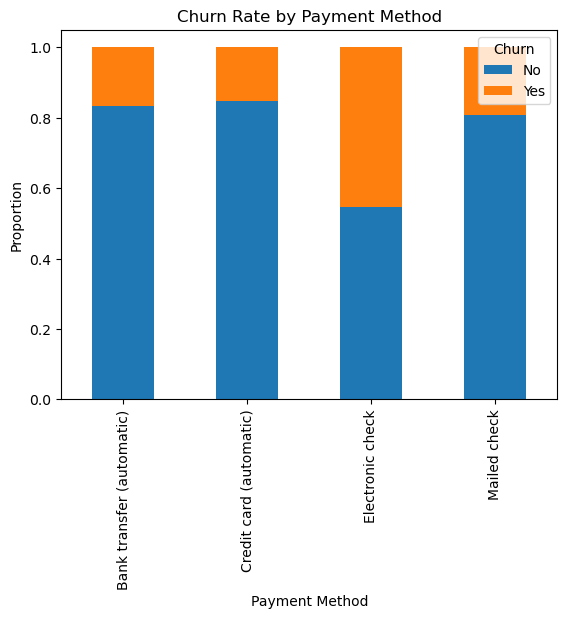

In [12]:
# Churn rate across payment methods

plt.figure(figsize=(8,4))
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Proportion')
plt.xlabel('Payment Method')
plt.legend(title='Churn')
plt.show()


In [13]:
missing_counts = df.isnull().sum()
print(missing_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


# 1
## Convert TotalCharges to numeric, coerce errors to NaN 
## AND
## Churn

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values are now NaN
print(df['TotalCharges'].isnull().sum())


11


In [16]:
df.loc[df['TotalCharges'].isnull() & (df['tenure'] == 0), 'TotalCharges'] = 0
print(df['TotalCharges'].isnull().sum())  # Should be 0 now


0


In [17]:
print(df.dtypes['TotalCharges'])  # Should now be float64


float64


In [18]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
print(df['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


## prepare your features for machine learning—this means encoding categorical variables and ensuring all features are in a suitable format for your models. Here’s a clear path forward:

### 2. Basic Encoding for BINARY Categorical variables


In [19]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
    
print(df[binary_cols].head())



   gender  Partner  Dependents  PhoneService  PaperlessBilling
0       0        1           0             0                 1
1       1        0           0             1                 0
2       1        0           0             1                 1
3       1        0           0             0                 0
4       0        0           0             1                 1


## 3. One-Hot Encoding for Multi-Category Columns

#### MultipleLines

#### InternetService

#### OnlineSecurity

#### OnlineBackup

#### DeviceProtection

#### TechSupport

#### StreamingTV

#### StreamingMovies

#### Contract

#### PaymentMethod

In [20]:
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [21]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False                            False            False   
2            False                            False            False   
3             True                            False            False   
4            False                            False            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  \
0              False              False   
1               True              False   
2              False              False   
3               True              False   
4              False              False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 32 columns]

## Step 6: Feature Engineering (Create New Features)


#### Tenure Buckets:

In [22]:
bins = [0, 12, 24, 48, 60, df['tenure'].max()]
labels = ['<12m', '12-24m', '24-48m', '48-60m', '>60m']

# Create tenure group categorical feature
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# One-hot encode the tenure group, dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)



#### Average Monthly Charges

In [23]:
df['AvgMonthlyCharge'] = df.apply(
    lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] > 0 else 0,
    axis=1
)


# List all _Yes columns that indicate active subscription
active_service_cols = [
    'PhoneService',
    'MultipleLines_Yes',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]

# Make sure all those columns exist in the dataframe
for col in active_service_cols:
    if col not in df.columns:
        raise KeyError(f"Expected column '{col}' not found in DataFrame.")

# Sum active services for each customer
df['TotalServices'] = df[active_service_cols].sum(axis=1)

# Verify the result
print(df['TotalServices'].describe())
print(df[['TotalServices', 'Churn']].groupby('TotalServices').mean())

df.head()


count     7043
unique       9
top          1
freq      1701
Name: TotalServices, dtype: int64
                  Churn
TotalServices          
0              0.437500
1              0.211052
2              0.328283
3              0.364767
4              0.313449
5              0.255507
6              0.224852
7              0.124051
8              0.052885


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0              False                                  False   
1              False                                  False   
2              False                                  False   
3              False                                  False   
4              False                                  False   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                            True                       False   
1                           False                        True   
2                           False                        True   
3                           False                       False   
4                            True                       False   

   tenure_group_12-24m  tenure_group_24-48m  tenure_group_48-60m  \
0                False                False                False   
1                False                 True                False   
2                False                False                False   
3                False                 True                False   
4                False                False                False   

   tenure_group_>60m  AvgMonthlyCharge  TotalServices  
0              False         29.850000              1  
1              False         55.573529              3  
2              False         54.075000              3  
3              False         40.905556              3  
4              False         75.825000              1  

[5 rows x 38 columns]

#### Total Services Subscribed


In [24]:
print(df['TotalServices'].unique())
print(df['TotalServices'].head(10))

df['TotalServices'] = pd.to_numeric(df['TotalServices'], errors='coerce')


[1 3 5 4 6 2 8 7 0]
0    1
1    3
2    3
3    3
4    1
5    5
6    4
7    1
8    6
9    3
Name: TotalServices, dtype: object


In [25]:
print(df['TotalServices'].isnull().sum())

print(df['TotalServices'].dtype)  # should now be float64 or int64


0
int64


In [26]:
df = df.drop('customerID', axis=1)
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0              False                                  False   
1              False                                  False   
2              False                                  False   
3              False                                  False   
4              False                                  False   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                            True                       False   
1                           False                        True   
2                           False                        True   
3                           False                       False   
4                            True                       False   

   tenure_group_12-24m  tenure_group_24-48m  tenure_group_48-60m  \
0                False                False                False   
1                False                 True                False   
2                False                False                False   
3                False                 True                False   
4                False                False                False   

   tenure_group_>60m  AvgMonthlyCharge  TotalServices  
0              False         29.850000              1  
1              False         55.573529              3  
2              False         54.075000              3  
3              False         40.905556              3  
4              False         75.825000              1  

[5 rows x 37 columns]

### 8: Split Data into Features (X) and Target (y)


In [31]:
# Split into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']


## Correlation heatmap


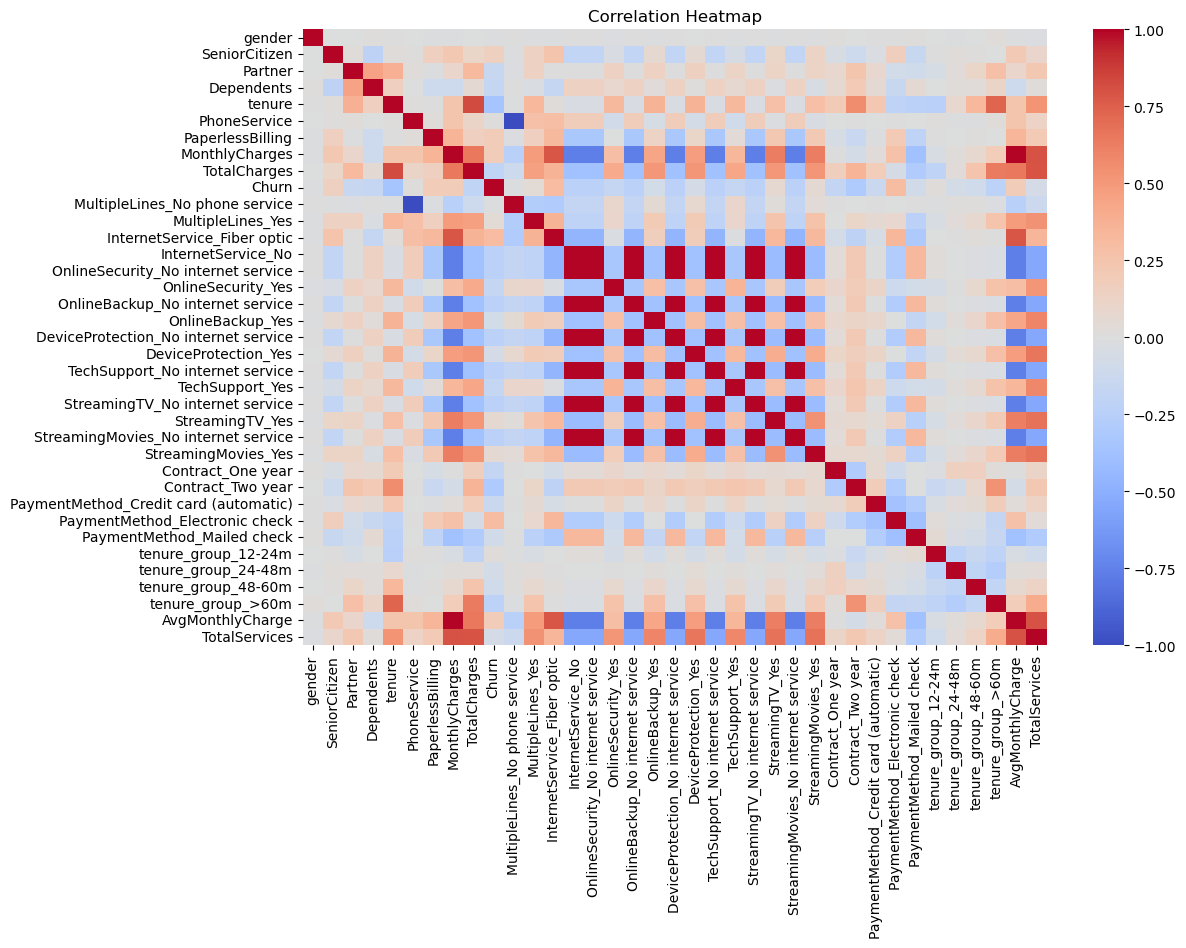

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Correlation heatmap with less-significant features dropped


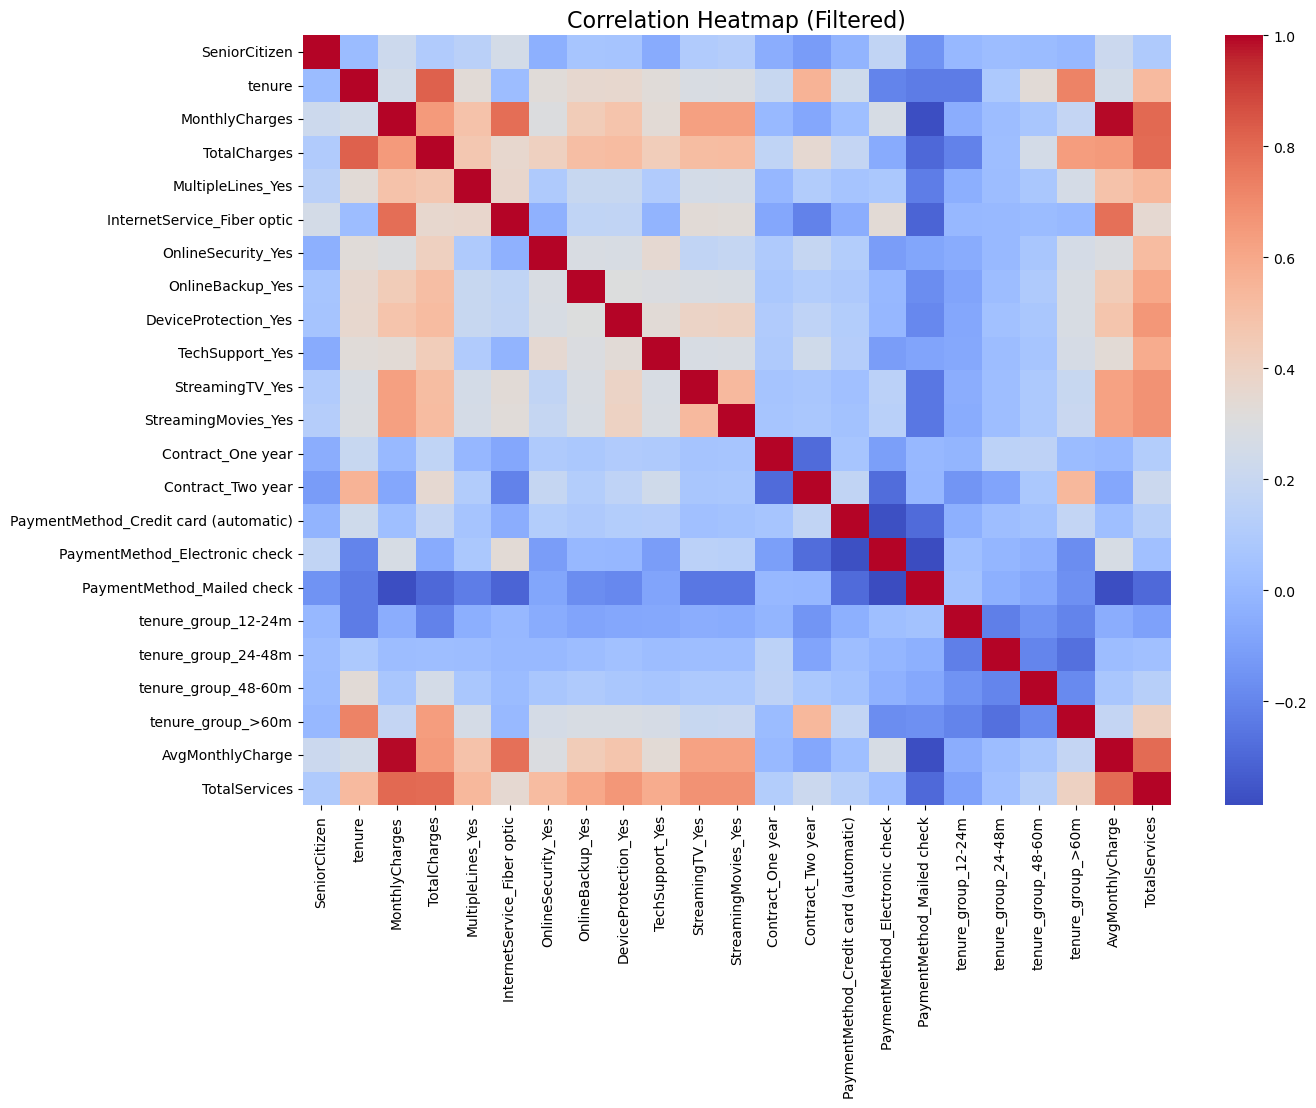

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for correlation analysis (selecting only numeric columns you want)
corr_df = df.copy()

# Drop some unnecessary columns (example: non-numeric and certain dummy vars you don't want)
drop_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines_No phone service', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
    'DeviceProtection_No internet service', 'TechSupport_No internet service',
    'StreamingTV_No internet service', 'StreamingMovies_No internet service'
]

corr_df = corr_df.drop(columns=drop_cols, errors='ignore')

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Filtered)", fontsize=16)
plt.show()


# Kernel Density Estimate (KDE) Plots for Numeric Features Grouped by Churn:



C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


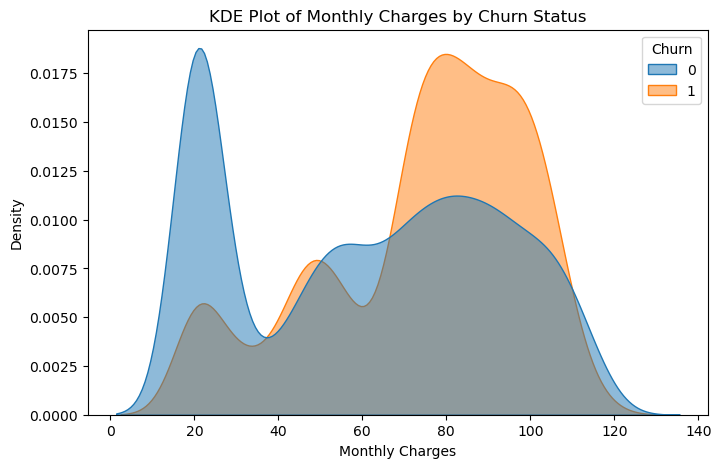

C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gurio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


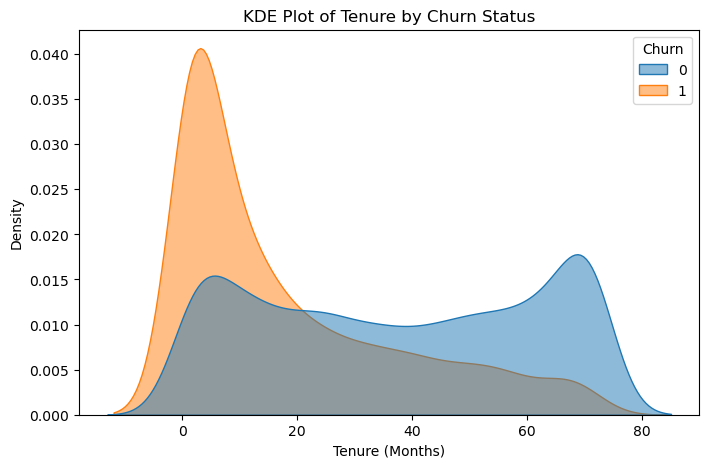

In [36]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.show()


# Interactive KDE plots using Plotly Express:

In [37]:
import plotly.express as px

# KDE-like density plot for MonthlyCharges
fig1 = px.histogram(
    df, x="MonthlyCharges", color="Churn",
    marginal="box",  # Adds a box plot on the side
    opacity=0.6,
    nbins=50,
    histnorm="density"
)
fig1.update_layout(
    title="Distribution of Monthly Charges by Churn Status",
    xaxis_title="Monthly Charges",
    yaxis_title="Density"
)
fig1.show()

# KDE-like density plot for Tenure
fig2 = px.histogram(
    df, x="tenure", color="Churn",
    marginal="violin",  # Adds a violin plot on the side
    opacity=0.6,
    nbins=50,
    histnorm="density"
)
fig2.update_layout(
    title="Distribution of Tenure by Churn Status",
    xaxis_title="Tenure (Months)",
    yaxis_title="Density"
)
fig2.show()


C:\Users\gurio\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


C:\Users\gurio\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Step 9: Train-Test Split with Stratification


In [38]:
from sklearn.model_selection import train_test_split

# Perform the stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,          # 20% for test set
    random_state=42,        # Any integer for reproducibility
    stratify=y              # Ensures class distribution is preserved
)

# Check resulting class balance:
print("Training set churn distribution:")
print(y_train.value_counts(normalize=True))
print("Test set churn distribution:")
print(y_test.value_counts(normalize=True))


Training set churn distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test set churn distribution:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### # If you haven't already installed imbalanced-learn, do so first:
#### !pip install --user imbalanced-learn


### SMOTE to the Training Data
### SMOTE is used on your training set to balance the classes (increase the minority class: churned customers). You do not apply SMOTE to your test set.

In [39]:
from imblearn.over_sampling import SMOTE

#Create a SMOTE instance
smote = SMOTE(random_state=42)

#Fit SMOTE only on training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Confirm the new class balance
print("Resampled class distribution:")
print(y_train_res.value_counts())


Resampled class distribution:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [40]:
# Check dtypes in resampled training set (should all be numeric)
print(X_train_res.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

##  training a baseline model (Logistic Regression)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)

# Predict on the original test data (not resampled)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[874 161]
 [145 229]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8577    0.8444    0.8510      1035
           1     0.5872    0.6123    0.5995       374

    accuracy                         0.7828      1409
   macro avg     0.7224    0.7284    0.7252      1409
weighted avg     0.7859    0.7828    0.7843      1409


ROC-AUC Score: 0.8268568033273916


C:\Users\gurio\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



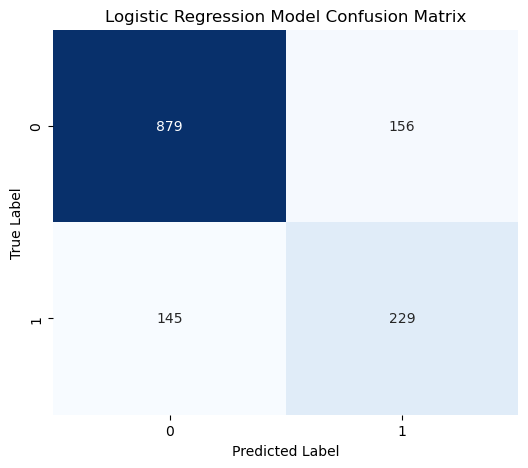

In [75]:

# Compute confusion matrix using feature-scaled log-reg model predictions
cm_basic_log_reg = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_basic_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
# Your logistic regression model trained on the SMOTE-balanced data shows the following:

# Confusion Matrix indicates:

# True negatives: 874

# False positives: 161

# False negatives: 145

# True positives: 229

# Classification Report highlights:

# Precision for churn (class 1): 58.7%

# Recall for churn: 61.2%

# F1-score for churn: 59.9%

# Overall accuracy: 78.3%

# ROC-AUC: 0.827, which is a good indicator of overall classification quality.

# The model is reasonably balanced in precision and recall on the minority class (churn), indicating it can identify churners moderately well but with room for improvement.

# Important note: Convergence Warning
# You received a warning that the logistic regression solver (lbfgs) failed to converge within the default iteration limit. This means the optimization algorithm did not fully find the best coefficients within the allowed iterations.

# How to address this:
# Increase the maximum number of iterations by setting a higher max_iter value in your logistic regression:

# python
# lr = LogisticRegression(max_iter=5000, random_state=42)  # increase from 1000 to 5000 or more
# Feature scaling (standardization) of your features can also help convergence and improve model performance:

# FEATURE-SCALED LOGISTIC REGRESSION MODEL

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model
lr = LogisticRegression(max_iter=5000, random_state=42)  # increase from 1000 to 5000 or more
lr.fit(X_train_res_scaled, y_train_res)

# Predict on the original test data (not resampled)
y_pred_fs = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_fs))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_fs, digits=4))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[879 156]
 [145 229]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8584    0.8493    0.8538      1035
           1     0.5948    0.6123    0.6034       374

    accuracy                         0.7864      1409
   macro avg     0.7266    0.7308    0.7286      1409
weighted avg     0.7884    0.7864    0.7874      1409


ROC-AUC Score: 0.8366658916531039


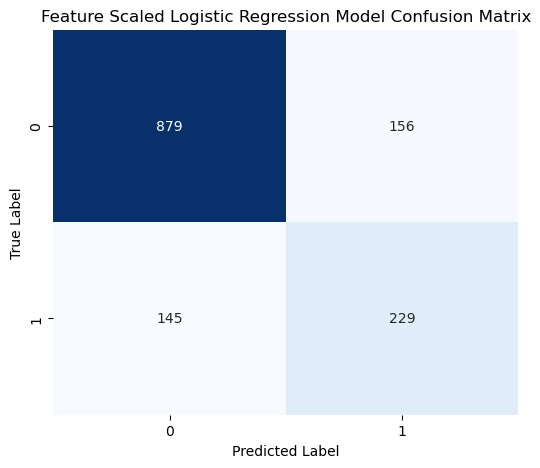

In [81]:

# Compute confusion matrix using feature-scaled log-reg model predictions
cm_scaled_log_reg = confusion_matrix(y_test, y_pred_fs)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_scaled_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Feature Scaled Logistic Regression Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
# logistic regression model with feature scaling shows a noticeable improvement:

# Accuracy improved slightly to 78.6%

# Precision for the minority churn class increased from ~58.7% to ~59.5%

# Recall remained the same at about 61.2%

# F1-score for churn improved marginally from 59.9% to 60.3%

# ROC-AUC improved from ~0.827 to ~0.837, indicating better overall discrimination

# What this means:
# Scaling your features helped the model converge better and find a slightly improved decision boundary.

# The model’s ability to identify churners (recall) remains steady, but precision and ROC-AUC gains show better confidence in predictions.

# The confusion matrix confirms a slightly better balance in false positives and true negatives.

# Next recommended steps to continue improving:
# Try stronger models:
# Random Forests, XGBoost, or LightGBM often deliver better predictive power for churn problems.

# Hyperparameter tuning:
# Use GridSearchCV or RandomizedSearchCV to tune your model’s hyperparameters for optimal performance.

# Feature engineering:
# Consider interaction terms, aggregations, or domain-specific features (e.g., tenure squared, spend ratios).

# Model explainability:
# Apply SHAP or LIME to interpret feature importances and provide actionable business insights.

# Threshold tuning:
# Adjust the classification threshold to optimize recall or precision based on business priorities

## Training a RANDOM FOREST MODEL ON SMOTE-balaned DATASET

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Scale your training and test features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)  # X_train_res is your SMOTE-resampled train set
X_test_scaled = scaler.transform(X_test)                # Scale test set using the same scaler

# 2. Train Random Forest on scaled training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res_scaled, y_train_res)

# 3. Predict and evaluate on scaled test data
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))

print("\nRandom Forest ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))



Random Forest Confusion Matrix:
[[866 169]
 [157 217]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.8465    0.8367    0.8416      1035
           1     0.5622    0.5802    0.5711       374

    accuracy                         0.7686      1409
   macro avg     0.7044    0.7085    0.7063      1409
weighted avg     0.7711    0.7686    0.7698      1409


Random Forest ROC-AUC Score: 0.8165581647678835


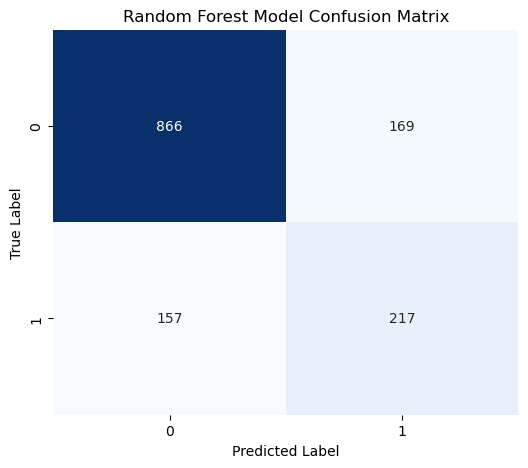

In [77]:

# Compute confusion matrix using random forest model predictions
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 2. Hyperparameter Tuning
#### Use GridSearchCV or RandomizedSearchCV to tune model parameters to improve performance. For Random Forest, parameters like n_estimators, max_depth, min_samples_split can be tuned.

### Example for RandomizedSearchCV:

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Scale your SMOTE-resampled training data and test data
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 2. Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 3. Instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# 4. Set up RandomizedSearchCV with cross-validation and scoring metric
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,             # number of parameter settings that are sampled
    cv=3,                  # 3-fold cross-validation
    scoring='roc_auc',     # metric to optimize
    random_state=42,
    n_jobs=-1,             # use all cores
    verbose=2
)

# 5. Fit randomized search on training data
rand_search.fit(X_train_res_scaled, y_train_res)

# 6. Get best model and parameters
best_rf = rand_search.best_estimator_
print("Best parameters found:", rand_search.best_params_)

# 7. Make predictions on the scaled test set
y_pred_best_rf = best_rf.predict(X_test_scaled)
y_proba_best_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# 8. Evaluate the tuned model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf, digits=4))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_best_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': False}
Confusion Matrix:
[[855 180]
 [148 226]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8524    0.8261    0.8391      1035
           1     0.5567    0.6043    0.5795       374

    accuracy                         0.7672      1409
   macro avg     0.7045    0.7152    0.7093      1409
weighted avg     0.7739    0.7672    0.7702      1409


ROC-AUC Score: 0.82296623524245


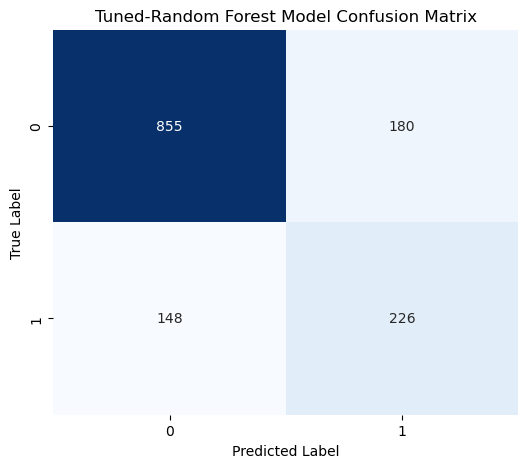

In [78]:

# Compute confusion matrix using random forest tuned parameters model predictions
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned-Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### get feature importances for current Random Forest 

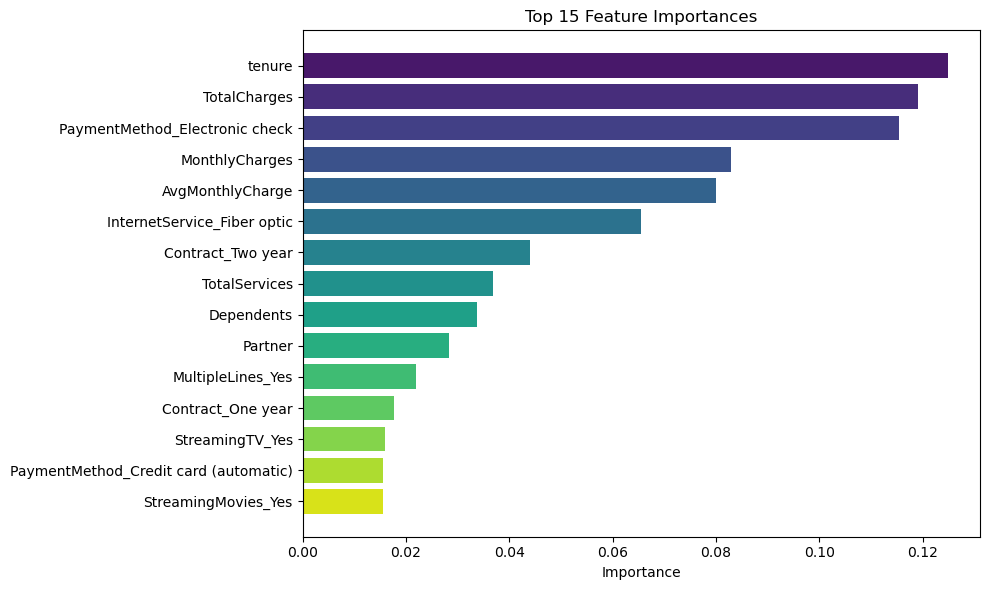

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming best_rf is your trained Random Forest model and X_train_res_scaled and X are defined as before

# Convert scaled training data back to DataFrame for feature names
X_train_df = pd.DataFrame(X_train_res_scaled, columns=X.columns)

# Get feature importances and sort
feature_imp = pd.Series(best_rf.feature_importances_, index=X_train_df.columns)
feature_imp = feature_imp.sort_values(ascending=False)

# Plot top 15 feature importances with viridis color palette
plt.figure(figsize=(10, 6))

top_features = feature_imp.head(15)
colors = sns.color_palette('viridis', n_colors=len(top_features))

# Plot horizontal bars with colors from viridis palette
plt.barh(top_features.index[::], top_features.values[::], color=colors[::])

plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.gca().invert_yaxis()  # Keep the most important feature on top
plt.show()


### Let's start with SHAP explainability for your Random Forest model. SHAP (SHapley Additive exPlanations) helps interpret the contribution of each feature to predictions, both globally (across all samples) and locally (for individual predictions). This will give you clear insight into what drives customer churn according to your model.


In [57]:
# #%matplotlib inline 

# #(Bonus Tip: If you're working in a notebook and want to visualize SHAP plots inline, make sure you include:)

# #!pip install shap --user

# import shap
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming best_rf is your trained Random Forest model
# # and X_test_scaled is your scaled test set as a DataFrame or array

# # Convert X_test_scaled back to DataFrame for SHAP plotting, if needed
# X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# # Create a SHAP TreeExplainer for Random Forest

# explainer = shap.TreeExplainer(best_rf)

# #explainer = shap.TreeExplainer(rf)

# import numpy as np

# # Set sample size
# sample_size = 1000

# if len(X_test_df) > sample_size:
#     sample_indices = np.random.choice(X_test_df.index, size=sample_size, replace=False)
#     X_test_sample = X_test_df.loc[sample_indices]
# else:
#     X_test_sample = X_test_df.copy()

# # Calculate SHAP values on the sample
# shap_values_sample = explainer.shap_values(X_test_sample)

# # Create SHAP summary plots with the sample
# shap.summary_plot(shap_values_sample[1], X_test_sample, plot_type="dot", show=True)
# shap.summary_plot(shap_values_sample[1], X_test_sample, plot_type="bar", show=True)


In [50]:
print("SHAP values shape:", shap_values_sample[1].shape)
print("Data shape:", X_test_sample.shape)


SHAP values shape: (36, 2)
Data shape: (1000, 36)


In [51]:
# Check shapes
print("shap_values_sample length:", len(shap_values_sample))
for i, sv in enumerate(shap_values_sample):
    print(f"Class {i} SHAP values shape:", sv.shape)

print("X_test_sample shape:", X_test_sample.shape)


shap_values_sample length: 1000
Class 0 SHAP values shape: (36, 2)
Class 1 SHAP values shape: (36, 2)
Class 2 SHAP values shape: (36, 2)
Class 3 SHAP values shape: (36, 2)
Class 4 SHAP values shape: (36, 2)
Class 5 SHAP values shape: (36, 2)
Class 6 SHAP values shape: (36, 2)
Class 7 SHAP values shape: (36, 2)
Class 8 SHAP values shape: (36, 2)
Class 9 SHAP values shape: (36, 2)
Class 10 SHAP values shape: (36, 2)
Class 11 SHAP values shape: (36, 2)
Class 12 SHAP values shape: (36, 2)
Class 13 SHAP values shape: (36, 2)
Class 14 SHAP values shape: (36, 2)
Class 15 SHAP values shape: (36, 2)
Class 16 SHAP values shape: (36, 2)
Class 17 SHAP values shape: (36, 2)
Class 18 SHAP values shape: (36, 2)
Class 19 SHAP values shape: (36, 2)
Class 20 SHAP values shape: (36, 2)
Class 21 SHAP values shape: (36, 2)
Class 22 SHAP values shape: (36, 2)
Class 23 SHAP values shape: (36, 2)
Class 24 SHAP values shape: (36, 2)
Class 25 SHAP values shape: (36, 2)
Class 26 SHAP values shape: (36, 2)
Class 

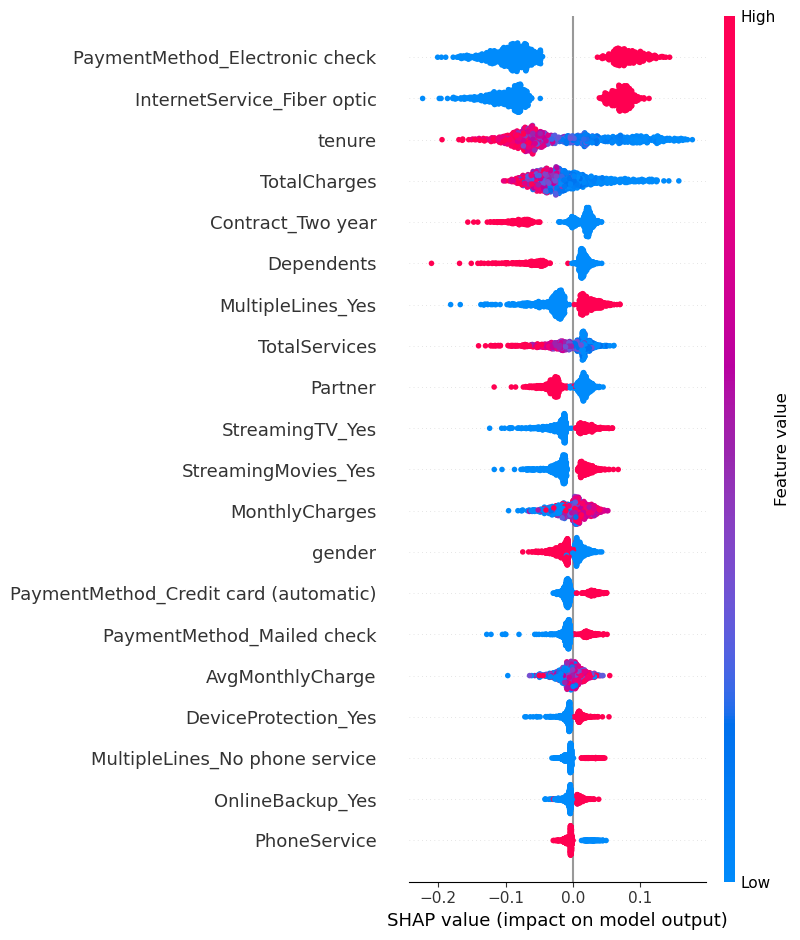

In [52]:
# # Using newer SHAP API for explanation values
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer(X_test_sample)  # returns an Explanation object

# # Plot summary for class 1 (or target=1)
# shap.summary_plot(shap_values[:, :, 1])


In [53]:
print(type(shap_values_sample))

print(f"Length of shap_values_sample: {len(shap_values_sample)}")  # Should be 2 for binary-class RF
print(f"Shape of class 0 SHAP values: {shap_values_sample[0].shape}")
print(f"Shape of class 1 SHAP values: {shap_values_sample[1].shape}")

<class 'numpy.ndarray'>
Length of shap_values_sample: 1000
Shape of class 0 SHAP values: (36, 2)
Shape of class 1 SHAP values: (36, 2)


Type of shap_values_sample: <class 'numpy.ndarray'>
Length of shap_values_sample: 1000
Shape of class 0 SHAP values: (36, 2)
Shape of class 1 SHAP values: (36, 2)


In [55]:
# import shap
# print(shap.__version__)


SHAP explanation values shape: (1000, 36, 2)


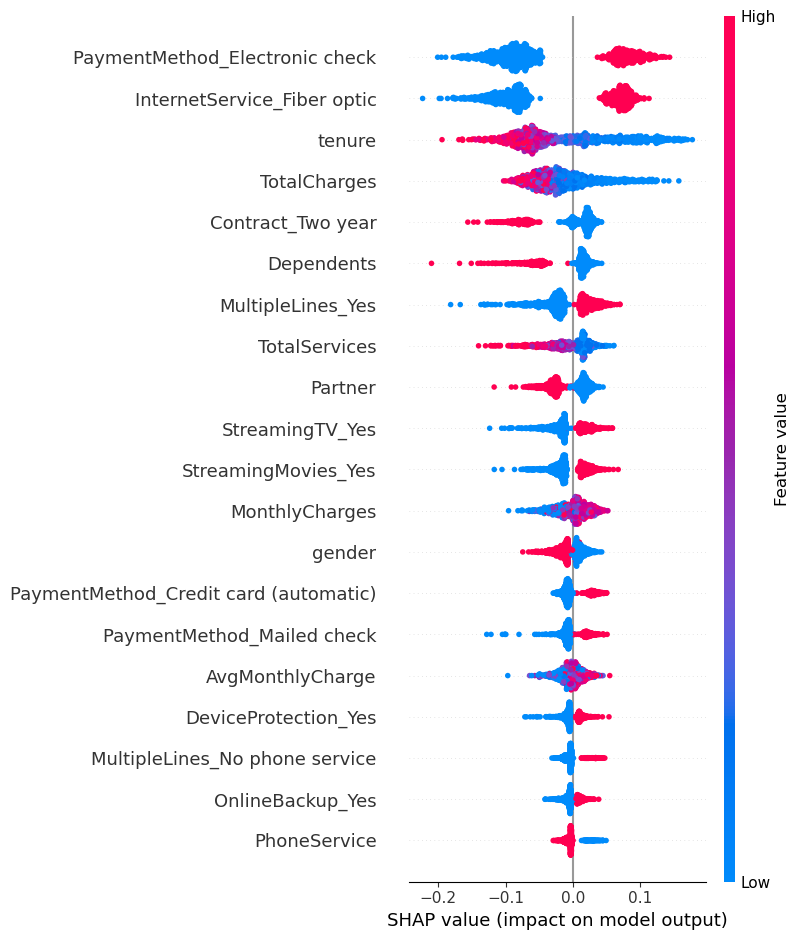

In [56]:
# Using the newer SHAP API to get Explanation object and avoid shape mismatch

# Assuming best_rf and X_test_sample are already defined as before

explainer = shap.TreeExplainer(best_rf)

# Get SHAP Explanation object (values with shape: samples x features x classes)
shap_values_exp = explainer(X_test_sample)

print("SHAP explanation values shape:", shap_values_exp.values.shape)

# Plot global summary for positive class (class 1 = churn)
shap.summary_plot(shap_values_exp.values[:, :, 1], X_test_sample)

### OUPUT
# is exactly what's expected when you use the newer SHAP API with a binary classifier:

# 1000: Number of samples in your test data subset (X_test_sample)

# 36: Number of features used for prediction

# 2: Number of classes (0 = non-churn, 1 = churn)


### How to use these SHAP values for plotting (class 1, i.e., "churn")
### For summary plots, focus on the SHAP values for the positive (churn) class. You can do this as follows:


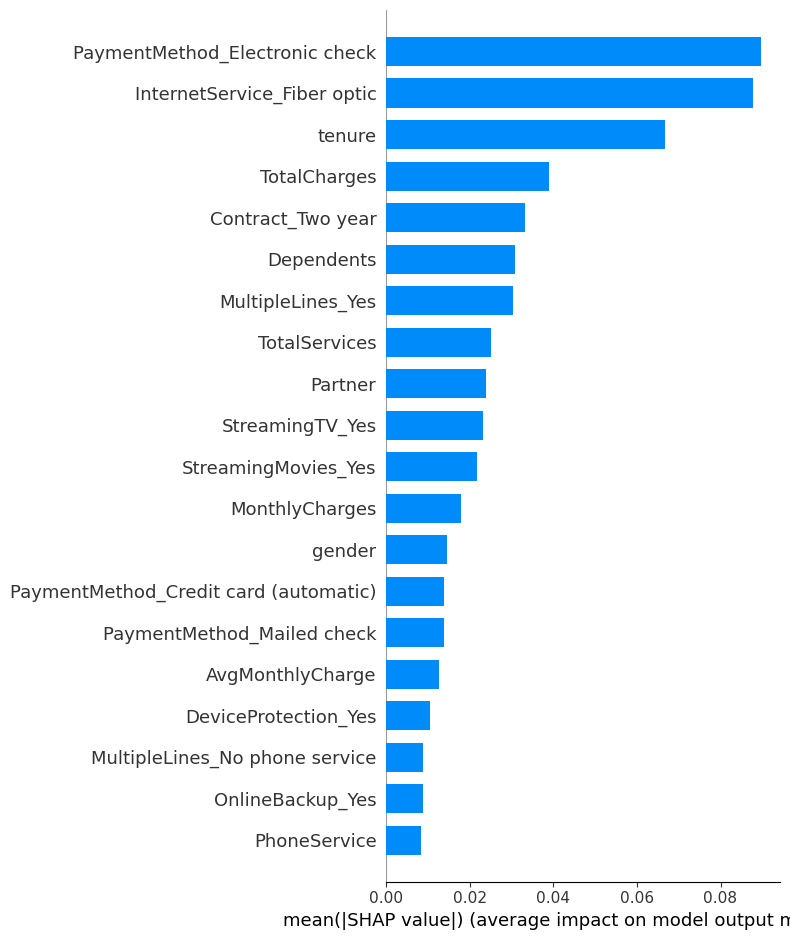

In [59]:
#You can also try the bar version for average global importance:

shap.summary_plot(shap_values_exp.values[:, :, 1], X_test_sample, plot_type="bar")


## XGBoost model for your churn prediction task.

### Step-by-step guide to train and evaluate an XGBoost classifier on your SMOTE-balanced, scaled dataset:

In [60]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# 1. Instantiate XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# 2. Train baseline model on resampled, scaled training data
xgb_clf.fit(X_train_res_scaled, y_train_res)

# 3. Predict on scaled test data
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_proba_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]



C:\Users\gurio\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[14:06:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




### # 4. Evaluate baseline model


In [61]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))

print("\nXGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


XGBoost Confusion Matrix:
[[868 167]
 [167 207]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0     0.8386    0.8386    0.8386      1035
           1     0.5535    0.5535    0.5535       374

    accuracy                         0.7630      1409
   macro avg     0.6961    0.6961    0.6961      1409
weighted avg     0.7630    0.7630    0.7630      1409


XGBoost ROC-AUC Score: 0.8094254566121574


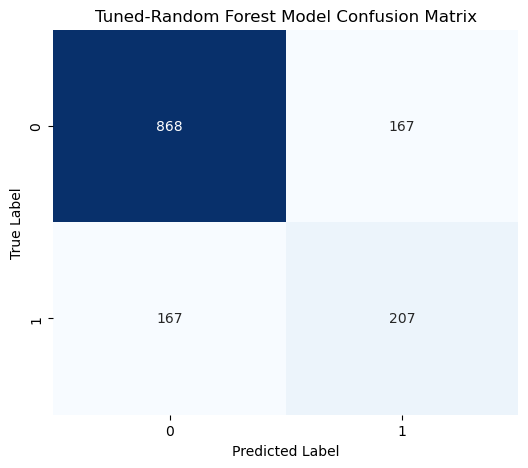

In [79]:
# Compute confusion matrix using XGBoost model predictions
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned-Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### # 5. Hyperparameter tuning (optional but recommended)


In [62]:


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.5, 2],
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train_res_scaled, y_train_res)

best_xgb = random_search.best_estimator_
print("Best XGBoost Parameters:", random_search.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\gurio\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[14:07:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best XGBoost Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


### Evaluate the tuned model


In [63]:
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
y_proba_best_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

print("Tuned XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))

print("\nTuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best_xgb, digits=4))

print("\nTuned XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba_best_xgb))

Tuned XGBoost Confusion Matrix:
[[874 161]
 [163 211]]

Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0     0.8428    0.8444    0.8436      1035
           1     0.5672    0.5642    0.5657       374

    accuracy                         0.7700      1409
   macro avg     0.7050    0.7043    0.7047      1409
weighted avg     0.7697    0.7700    0.7699      1409


Tuned XGBoost ROC-AUC Score: 0.8158141517476555


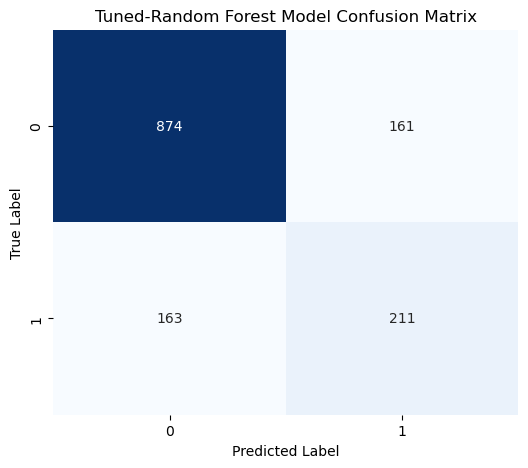

In [82]:
# Compute confusion matrix using XGBoost model predictions
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Tuned-Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature importance for XGBOOST MODEL AND TUNED XGBOOST MODEL

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot top features of an XGBoost model
def plot_xgb_feature_importance(model, feature_names, title, top_n=15):
    # Get feature importances from the model
    importance_dict = model.get_booster().get_score(importance_type='weight')
    
    # Convert to DataFrame for sorting and visualization
    imp_df = pd.DataFrame({
        'Feature': [feature_names[int(k[1:])] if k[0] == 'f' else k for k in importance_dict.keys()],
        'Importance': list(importance_dict.values())
    })
    
    imp_df = imp_df.sort_values(by='Importance', ascending=False).head(top_n)
    
    # Plot with a color palette
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('viridis', n_colors=top_n)
    sns.barplot(x='Importance', y='Feature', data=imp_df, palette=colors)
    plt.title(title)
    plt.tight_layout()
    plt.show()




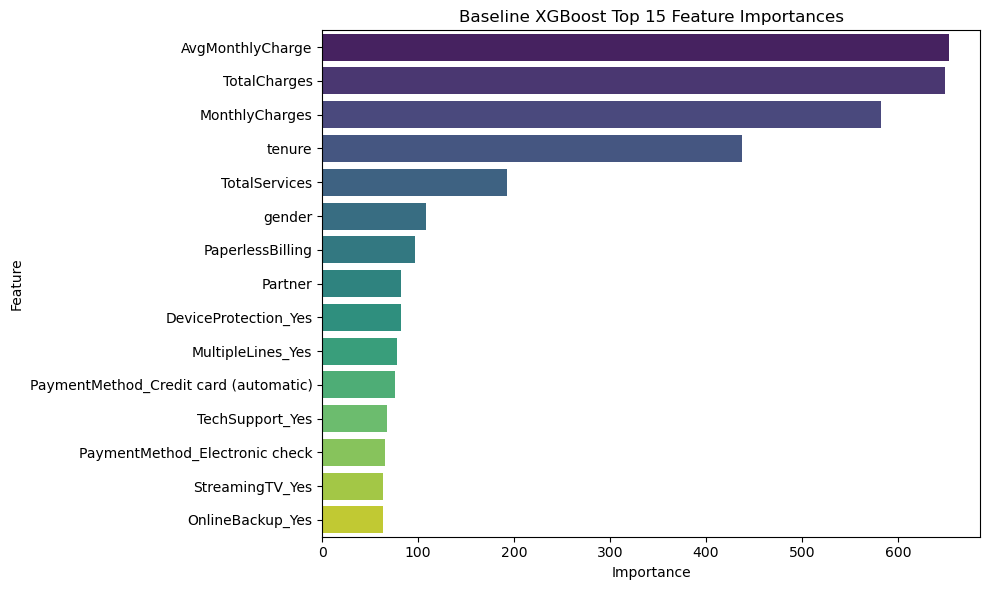

In [84]:
# Plot for baseline XGBoost
plot_xgb_feature_importance(xgb_clf, X.columns, 'Baseline XGBoost Top 15 Feature Importances')


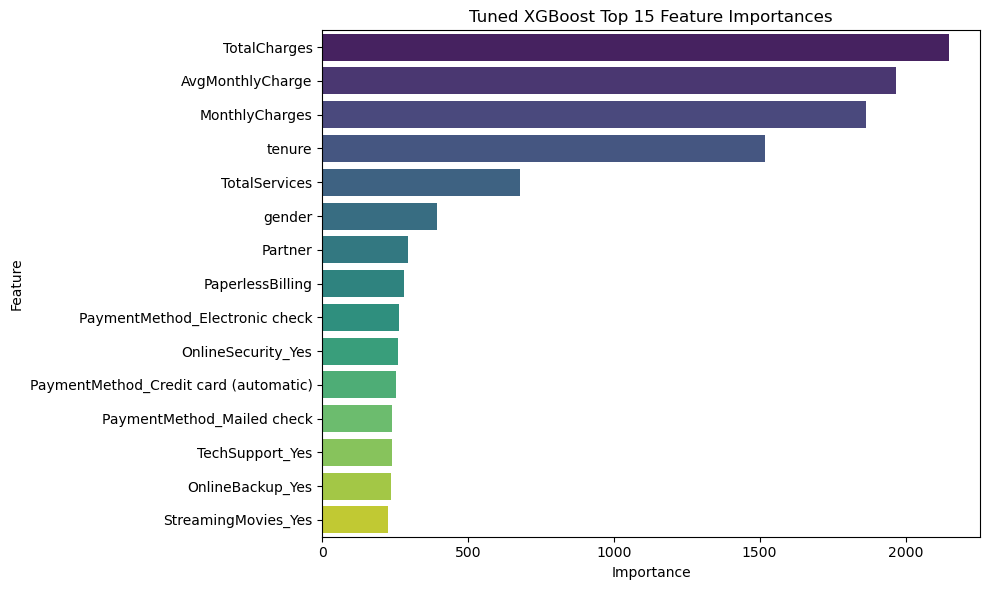

In [85]:

# Plot for tuned XGBoost
plot_xgb_feature_importance(best_xgb, X.columns, 'Tuned XGBoost Top 15 Feature Importances')

# Let's proceed with building an ensemble method for your churn prediction task. Combining your best models—such as Logistic Regression, tuned Random Forest, and tuned XGBoost—can often improve predictive performance by leveraging their individual strengths.

### Example: Voting Classifier using Hard or Soft Voting

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have:
# - scaled SMOTE training data: X_train_res_scaled, y_train_res
# - scaled test data: X_test_scaled
# - trained models: lr (logistic regression), best_rf (tuned Random Forest), best_xgb (tuned XGBoost)

# Create a VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'  # use 'soft' to average predicted probabilities (better performance usually)
)

# Train ensemble on training data
ensemble.fit(X_train_res_scaled, y_train_res)

# Predict on the test set
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_proba_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]

# Evaluate ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Ensemble Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble, digits=4))

print("\nEnsemble ROC-AUC Score:", roc_auc_score(y_test, y_proba_ensemble))


C:\Users\gurio\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[14:24:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Ensemble Confusion Matrix:
[[880 155]
 [153 221]]

Ensemble Classification Report:
              precision    recall  f1-score   support

           0     0.8519    0.8502    0.8511      1035
           1     0.5878    0.5909    0.5893       374

    accuracy                         0.7814      1409
   macro avg     0.7198    0.7206    0.7202      1409
weighted avg     0.7818    0.7814    0.7816      1409


Ensemble ROC-AUC Score: 0.8336252551086312


In [87]:
# Ensemble Model Performance Summary
# Accuracy: 78.1%
# Your model correctly classified about 78% of all customers (both those who churn and those who don’t). This is a good overall performance considering class imbalance.

# Precision for Churn (class 1): 58.8%
# Out of all customers your model predicted as churners, about 58.8% truly churned. So, when the model flags a customer as likely to churn, it is correct roughly 6 out of 10 times.

# Recall for Churn: 59.1%
# The model captures about 59.1% of the actual churners. This means it detects more than half of all churn events, which is useful for proactive retention efforts.

# F1-Score for Churn: 58.9%
# The harmonic mean of precision and recall balances the trade-off between false positives and false negatives.

# ROC-AUC Score: 0.834
# This is a strong score indicating the model has a good ability to differentiate between churners and non-churners across all classification thresholds.

# Business Implication of These Metrics
# Balanced performance: Your ensemble improves over initial individual models, especially in ROC-AUC, implying better overall classification quality.

# Moderate precision and recall: There is a balance between catching actual churners and not falsely alarming too many loyal customers. Depending on your retention campaign costs, you may want to lean towards improving recall (catching more churners) or precision (reducing false alarms).

# False positives and false negatives:

# False positives (customers incorrectly predicted as churners): 155 — These customers may receive retention offers unnecessarily.

# False negatives (actual churners missed by model): 153 — These are risky as these churners won’t be contacted, resulting in lost revenue.

# Possible Next Steps for Interpretation and Improvement
# Threshold tuning:
# Adjust classification threshold to optimize precision or recall depending on business costs. For example, decreasing the threshold may increase recall but reduce precision.

# Feature importance analysis:
# Use SHAP or built-in feature importance to understand key drivers influencing the ensemble’s predictions and aid business insights.

# Segment analysis:
# Analyze which customer groups the model performs best or worst on (e.g., tenure, geography) for targeted strategies.

# Cost-sensitive learning:
# Incorporate business cost of retention and churn directly into model training to balance risks.

# Further ensembling or stacking:
# Try stacked ensembles or blending more models to potentially improve performance

# VISUALIZATIONS

## CONFUSION MATRIX HEATMAP

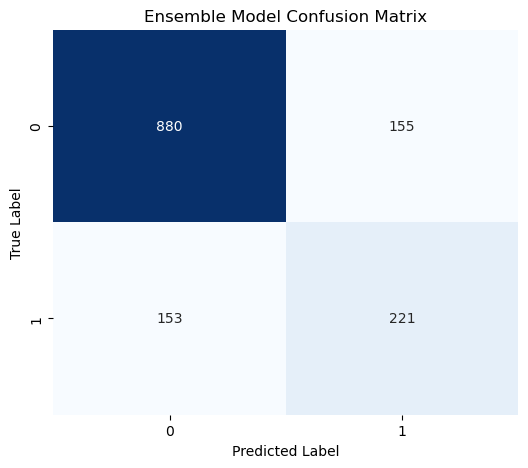

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix using ensemble model predictions
cm = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## ROC CURVE WITH AUC

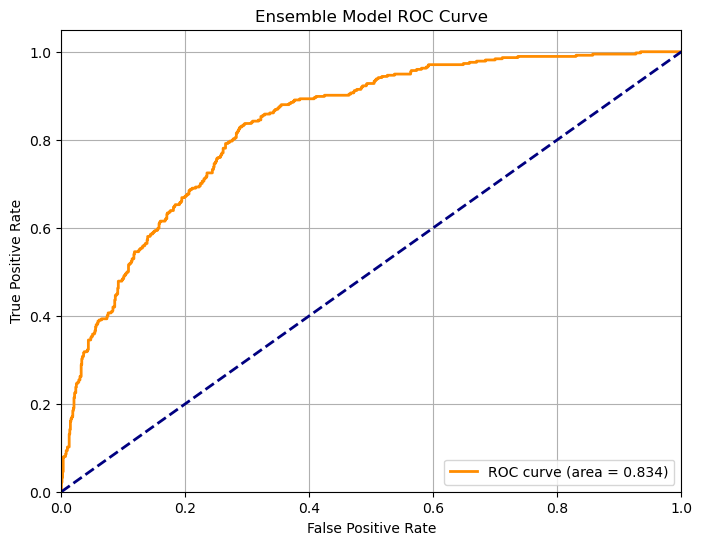

In [89]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba_ensemble)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble Model ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## PRECISION-RECALL CURVE

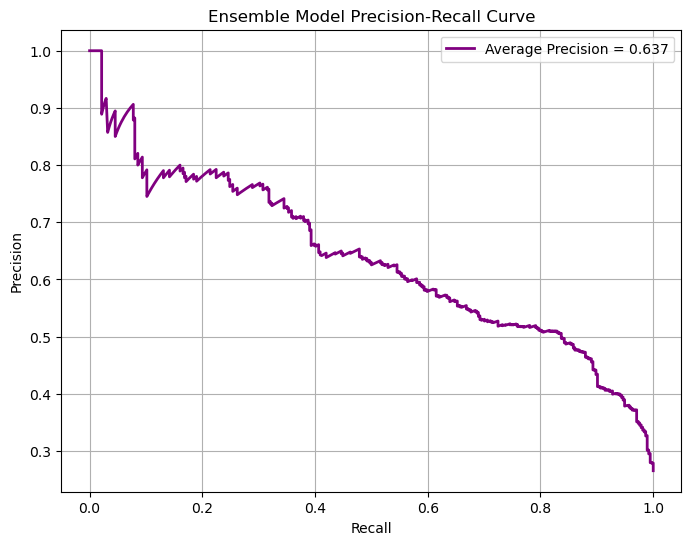

In [90]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Average Precision = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Model Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## FEATURE IMPORTANCE CURVE FOR ENSEMBLE COMPONENTS

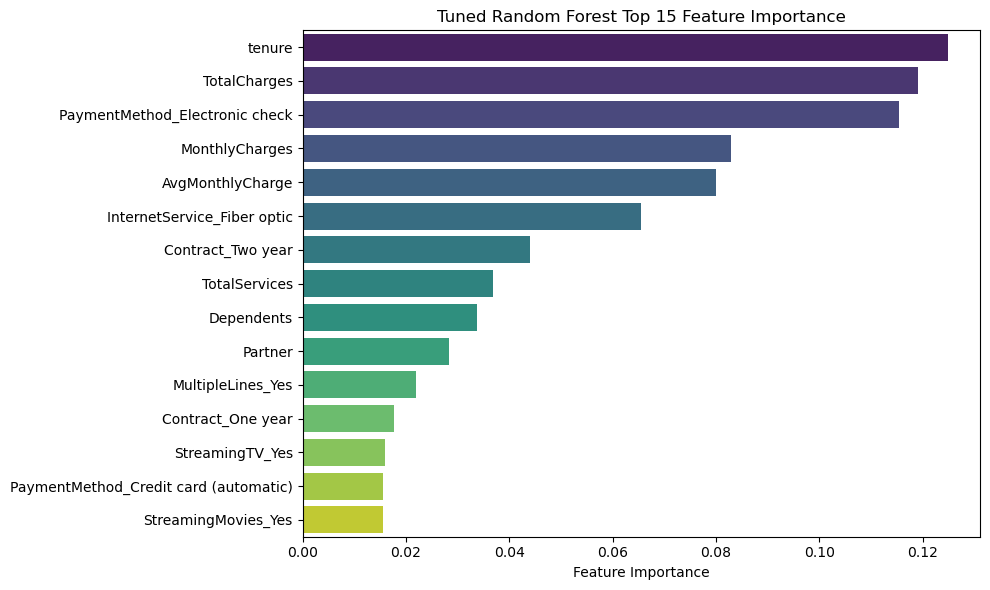

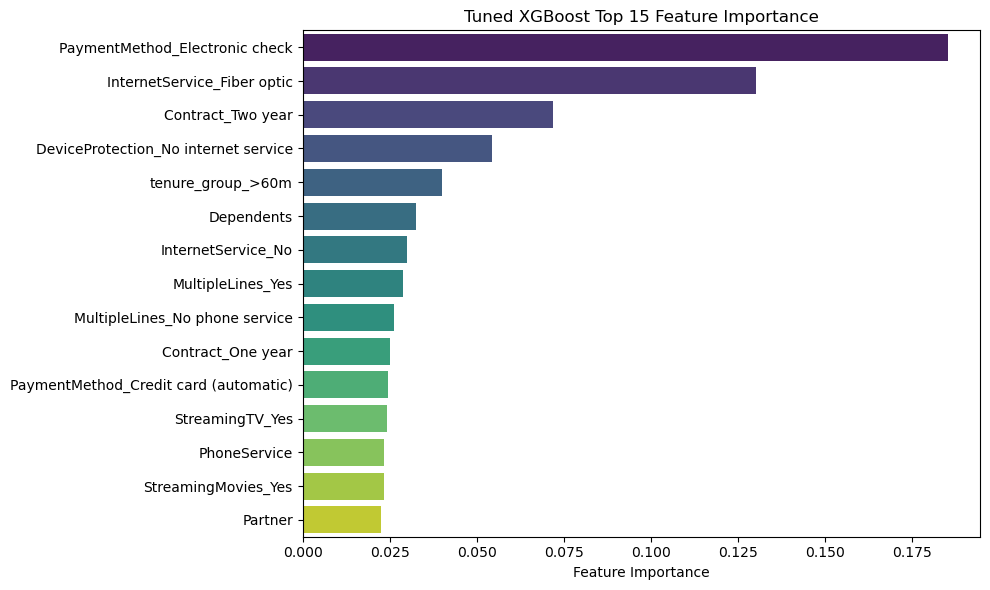

In [91]:
import pandas as pd
import seaborn as sns

def plot_feature_importance(model, feature_names, title, top_n=15):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For XGBoost booster
        importances_dict = model.get_booster().get_score(importance_type='weight')
        importances = pd.Series(importances_dict).sort_values(ascending=False)
        # Convert to array matching feature_names if needed
        importances = importances.reindex([f'f{i}' for i in range(len(feature_names))], fill_value=0).values

    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

# Plot for tuned Random Forest
plot_feature_importance(best_rf, X.columns, 'Tuned Random Forest Top 15 Feature Importance')

# Plot for tuned XGBoost
plot_feature_importance(best_xgb, X.columns, 'Tuned XGBoost Top 15 Feature Importance')


## MODEL COMPARISION (BAR CHART)

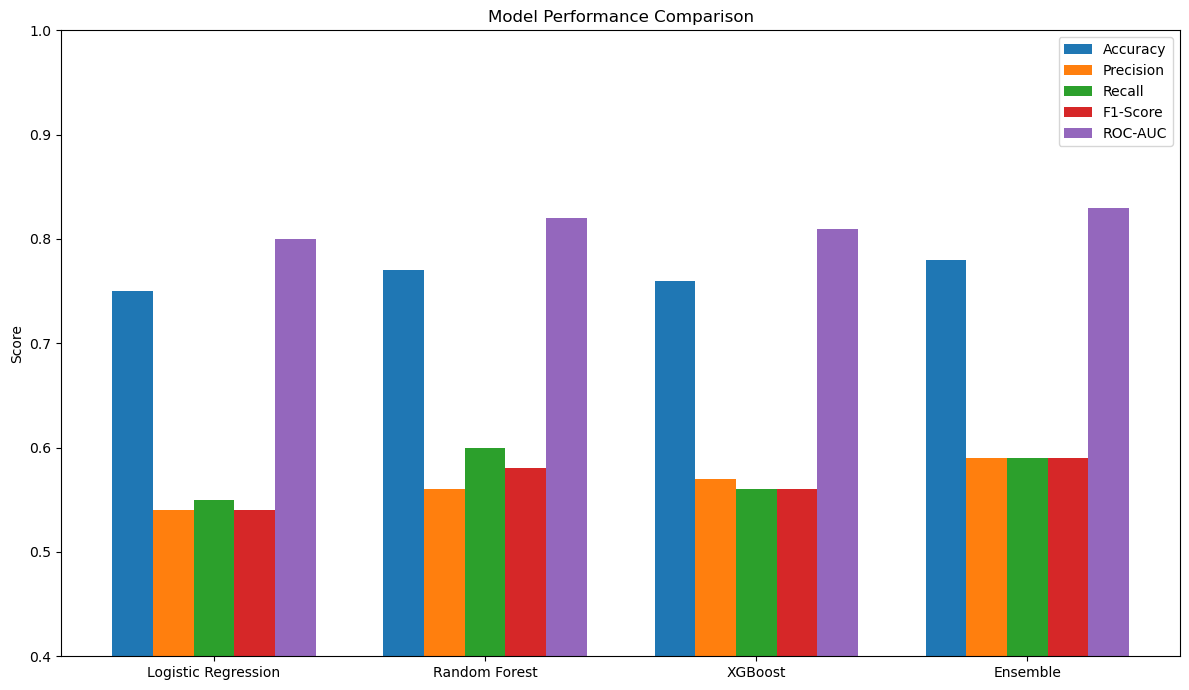

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Example metric data, replace with your actual results:
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Ensemble']
accuracy = [0.75, 0.77, 0.76, 0.78]     # fill with your actual values
precision = [0.54, 0.56, 0.57, 0.59]
recall = [0.55, 0.60, 0.56, 0.59]
f1 = [0.54, 0.58, 0.56, 0.59]
roc_auc = [0.80, 0.82, 0.81, 0.83]

metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(models))

plt.figure(figsize=(12, 7))
width = 0.15
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, metric, width=width, label=metric_names[i])

plt.xticks(x + 2*width, models)
plt.ylim([0.4, 1.0])
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()


##  Interactive ROC Curve with Plotly

In [93]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_ensemble)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve',
                         line=dict(color='darkorange', width=4)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines',
                         line=dict(color='navy', width=2, dash='dash'),
                         showlegend=False))

fig.update_layout(title='Interactive ROC Curve - Ensemble Model',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  width=700, height=500)
fig.show()


## Interactive PrecisioN-Recall Curve

In [94]:
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)

# Create interactive Precision-Recall Curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve',
                         line=dict(color='purple', width=4)))

fig.update_layout(title=f'Interactive Precision-Recall Curve - Ensemble Model (AP={avg_precision:.3f})',
                  xaxis_title='Recall',
                  yaxis_title='Precision',
                  width=700, height=500)
fig.show()


## Interactive Feature Importance Bar Chart for Tuned Random Forest


In [95]:
import plotly.express as px
import pandas as pd

# Extract feature importances
feature_imp_rf = pd.Series(best_rf.feature_importances_, index=X.columns)
top15_rf = feature_imp_rf.sort_values(ascending=False).head(15).reset_index()
top15_rf.columns = ['Feature', 'Importance']

# Interactive bar chart
fig = px.bar(top15_rf, x='Importance', y='Feature', orientation='h',
             color='Importance', color_continuous_scale='viridis',
             title='Top 15 Feature Importances - Tuned Random Forest')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, width=700, height=500)
fig.show()


## Interactive Feature Importance Bar Chart for Tuned XGBoost


In [96]:
import plotly.express as px
import pandas as pd

# Get XGBoost feature importance by weight
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
# Map feature names
importance_df = pd.DataFrame({
    'Feature': [X.columns[int(k[1:])] if k.startswith('f') else k for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})
top15_xgb = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Interactive bar chart
fig = px.bar(top15_xgb, x='Importance', y='Feature', orientation='h',
             color='Importance', color_continuous_scale='viridis',
             title='Top 15 Feature Importances - Tuned XGBoost')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, width=700, height=500)
fig.show()


# INTERACTIVE DASHBOARDS

## USING DASH

In [ ]:
#!pip install dash

import dash
from dash import html, dcc
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, roc_auc_score, precision_score, recall_score
import pandas as pd


# Initialize the Dash app
app = dash.Dash(__name__)

# Prepare data for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble)

roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve', line=dict(color='darkorange', width=4)))
roc_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='navy', width=2, dash='dash'), showlegend=False))
roc_fig.update_layout(title='ROC Curve - Ensemble Model', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Prepare data for Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)

pr_fig = go.Figure()
pr_fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve', line=dict(color='purple', width=4)))
pr_fig.update_layout(title=f'Precision-Recall Curve - Ensemble Model (AP={avg_precision:.3f})', xaxis_title='Recall', yaxis_title='Precision')

# Feature importance for Random Forest
feature_imp_rf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15).reset_index()
feature_imp_rf.columns = ['Feature', 'Importance']
rf_fig = px.bar(feature_imp_rf, x='Importance', y='Feature', orientation='h', color='Importance', color_continuous_scale='viridis', title='Top 15 Feature Importances - Tuned Random Forest')
rf_fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Feature importance for XGBoost
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': [X.columns[int(k[1:])] if k.startswith('f') else k for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})
top15_xgb = importance_df.sort_values(by='Importance', ascending=False).head(15)
xgb_fig = px.bar(top15_xgb, x='Importance', y='Feature', orientation='h', color='Importance', color_continuous_scale='viridis', title='Top 15 Feature Importances - Tuned XGBoost')
xgb_fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Define the app layout
app.layout = html.Div([
    html.H1('Churn Prediction Model Dashboard', style={'textAlign': 'center'}),
    html.Div([
        html.H2('Model Performance Metrics'),
        html.P(f"Ensemble ROC-AUC Score: {roc_auc_score(y_test, y_proba_ensemble):.3f}"),
        html.P(f"Ensemble Accuracy: {(y_pred_ensemble == y_test).mean():.3f}"),
        html.P(f"Ensemble Precision (Churn): {precision_score(y_test, y_pred_ensemble):.3f}"),
        html.P(f"Ensemble Recall (Churn): {recall_score(y_test, y_pred_ensemble):.3f}"),
        html.Hr(),
        dcc.Graph(figure=roc_fig),
        dcc.Graph(figure=pr_fig),
        dcc.Graph(figure=rf_fig),
        dcc.Graph(figure=xgb_fig),
    ], style={'width': '80%', 'margin': 'auto'})
])

if __name__ == '__main__':
    app.run(debug=True)



# DASH DASHBOARD WITH KEY METRICS, CONFUSION MATRIX INCLUDED

In [98]:
import dash
from dash import html, dcc
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from sklearn.metrics import (
    roc_curve, precision_recall_curve, average_precision_score, 
    roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
)

# ----- Replace these with your actual variable assignments -----
# X.columns, y_test, y_pred_ensemble, y_proba_ensemble, best_rf, best_xgb
# --------------------------------------------------------------

# Key metrics
accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
rocauc = roc_auc_score(y_test, y_proba_ensemble)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
cm_fig = ff.create_annotated_heatmap(
    z=cm,
    x=['Pred 0', 'Pred 1'],
    y=['True 0', 'True 1'],
    annotation_text=cm.astype(str),
    colorscale='Blues',
    showscale=False
)
cm_fig.update_layout(title='Confusion Matrix')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble)
roc_fig = go.Figure()
roc_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve',
                             line=dict(color='darkorange', width=4)))
roc_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines',
                             line=dict(color='navy', width=2, dash='dash'), showlegend=False))
roc_fig.update_layout(
    title='ROC Curve - Ensemble Model',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate'
)

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)
pr_fig = go.Figure()
pr_fig.add_trace(go.Scatter(x=recall_vals, y=precision_vals, mode='lines', name='Precision-Recall Curve',
                             line=dict(color='purple', width=4)))
pr_fig.update_layout(
    title=f'Precision-Recall Curve - Ensemble Model (AP={avg_precision:.3f})',
    xaxis_title='Recall',
    yaxis_title='Precision'
)

# Random Forest Feature Importance
feature_imp_rf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15).reset_index()
feature_imp_rf.columns = ['Feature', 'Importance']
rf_fig = px.bar(
    feature_imp_rf, x='Importance', y='Feature', orientation='h', 
    color='Importance', color_continuous_scale='viridis',
    title='Top 15 Feature Importances - Tuned Random Forest')
rf_fig.update_layout(yaxis={'categoryorder':'total ascending'})

# XGBoost Feature Importance
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': [X.columns[int(k[1:])] if k.startswith('f') else k for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})
top15_xgb = importance_df.sort_values(by='Importance', ascending=False).head(15)
xgb_fig = px.bar(
    top15_xgb, x='Importance', y='Feature', orientation='h', 
    color='Importance', color_continuous_scale='viridis',
    title='Top 15 Feature Importances - Tuned XGBoost')
xgb_fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Dash app layout
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Customer Churn Prediction Model Dashboard', style={'textAlign': 'center'}),
    html.Div([
        html.H2('Model Performance Metrics'),
        html.P(f"Ensemble Accuracy: {accuracy:.3f}"),
        html.P(f"Ensemble Precision (Churn): {precision:.3f}"),
        html.P(f"Ensemble Recall (Churn): {recall:.3f}"),
        html.P(f"Ensemble ROC-AUC Score: {rocauc:.3f}"),
        html.Hr(),
        html.H3('Confusion Matrix'),
        dcc.Graph(figure=cm_fig),

        html.H3('ROC Curve'),
        dcc.Graph(figure=roc_fig),

        html.H3('Precision-Recall Curve'),
        dcc.Graph(figure=pr_fig),

        html.H3('Top Feature Importances (Random Forest)'),
        dcc.Graph(figure=rf_fig),

        html.H3('Top Feature Importances (XGBoost)'),
        dcc.Graph(figure=xgb_fig),
    ], style={'width': '80%', 'margin': 'auto'})
])

if __name__ == '__main__':
    app.run(debug=True)


# STREAMLIT DAHSBOARD CODE

In [99]:
#!pip install streamlit

In [100]:
/

# --- Save models/outputs for Streamlit dashboard ---


In [ ]:
import joblib
import os

# Choose a location to save (use an absolute path or a path relative to where you'll run streamlit)
save_path = "C:/Users/gurio/Downloads/Telco Customer Churn Dataset/model_outputs.pkl"   # change to a folder if you want: "artifacts/model_outputs.pkl"
os.makedirs(os.path.dirname(save_path) or ".", exist_ok=True)

# Put everything into a single dict. Keep X.columns (feature names) instead of full X to avoid saving huge data.
to_save = {
    "y_test": y_test,                           # pandas Series
    "y_pred_ensemble": y_pred_ensemble,         # numpy array or pd.Series
    "y_proba_ensemble": y_proba_ensemble,       # numpy array
    "feature_names": list(X.columns),           # list of column names used for plots
    "best_rf": best_rf,                         # trained RandomForest
    "best_xgb": best_xgb,                       # trained XGBoost
    "scaler": scaler                            # if used for plotting or inverse transforms
}

joblib.dump(to_save, save_path)
print(f"Saved model outputs to: {save_path}")


# STREAMLIT UPDATED CODE FOR DASHBOARD #gpT5


In [ ]:

import streamlit as st
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import plotly.graph_objects as go
import plotly.express as px

# Load saved models and data
@st.cache_data
def load_data(file_path='model_outputs.pkl'):
    data = joblib.load(file_path)
    return data

data = load_data()

# Unpack loaded data
y_test = data['y_test']
y_pred_ensemble = data['y_pred_ensemble']
y_proba_ensemble = data['y_proba_ensemble']
feature_names = data['feature_names']
best_rf = data['best_rf']
best_xgb = data['best_xgb']
scaler = data['scaler']

st.title("Telco Customer Churn Prediction Dashboard")

st.markdown("""
This dashboard presents evaluation results and insights from the Telco Customer Churn Prediction models:
- Ensemble model performance
- ROC and Precision-Recall curves
- Feature importance for Random Forest and XGBoost
""")

# Display classification report as a dataframe for better formatting
st.header("Ensemble Model Evaluation Metrics")
report = classification_report(y_test, y_pred_ensemble, output_dict=True)
report_df = pd.DataFrame(report).transpose()
st.dataframe(report_df.style.format("{:.2f}"))

# Confusion Matrix heatmap
st.subheader("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_ensemble)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")
st.pyplot(fig)

# ROC Curve
st.subheader("ROC Curve")
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble)
roc_auc = roc_auc_score(y_test, y_proba_ensemble)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve',
                             line=dict(color='darkorange', width=3)))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines',
                             line=dict(color='navy', width=2, dash='dash'),
                             showlegend=False))
fig_roc.update_layout(title=f'ROC Curve (AUC = {roc_auc:.3f})',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      width=700, height=500)
st.plotly_chart(fig_roc)

# Precision-Recall Curve
st.subheader("Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)

fig_pr = go.Figure()
fig_pr.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve',
                            line=dict(color='purple', width=3)))
fig_pr.update_layout(title=f'Precision-Recall Curve (Average Precision = {avg_precision:.3f})',
                     xaxis_title='Recall',
                     yaxis_title='Precision',
                     width=700, height=500)
st.plotly_chart(fig_pr)

# Feature Importance for Random Forest
st.header("Top 15 Feature Importances - Random Forest")
feature_imp_rf = pd.Series(best_rf.feature_importances_, index=feature_names)
top15_rf = feature_imp_rf.sort_values(ascending=False).head(15).reset_index()
top15_rf.columns = ['Feature', 'Importance']

fig_rf = px.bar(top15_rf, x='Importance', y='Feature', orientation='h',
                color='Importance', color_continuous_scale='viridis',
                title='Random Forest Feature Importances (Top 15)')
fig_rf.update_layout(yaxis={'categoryorder':'total ascending'}, width=700, height=500)
st.plotly_chart(fig_rf)

# Feature Importance for XGBoost
st.header("Top 15 Feature Importances - XGBoost")
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': [feature_names[int(k[1:])] if k.startswith('f') else k for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})
top15_xgb = importance_df.sort_values(by='Importance', ascending=False).head(15)

fig_xgb = px.bar(top15_xgb, x='Importance', y='Feature', orientation='h',
                 color='Importance', color_continuous_scale='viridis',
                 title='XGBoost Feature Importances (Top 15)')
fig_xgb.update_layout(yaxis={'categoryorder':'total ascending'}, width=700, height=500)
st.plotly_chart(fig_xgb)

# Optional: Single Customer Prediction (if you want interactive input)
st.header("Predict Churn for a Single Customer")

# Prepare form inputs dynamically based on features
# For simplicity, we'll just input numeric values for this example (you can extend to categorical)
with st.form("customer_form"):
    st.write("Enter feature values for prediction:")

    inputs = {}
    for feat in feature_names:
        # Example: numeric input, change to selectbox for categoricals if you want
        inputs[feat] = st.number_input(feat, value=0.0)

    submitted = st.form_submit_button("Predict Churn")
    if submitted:
        # Create DataFrame for input
        input_df = pd.DataFrame([inputs])
        # Scale input
        input_scaled = scaler.transform(input_df)
        # Predict using ensemble (soft voting)
        # Ensemble consists of best_rf, best_xgb, and logistic regression (not saved here, so use RF and XGB weighted avg)

        # Get probabilities from RF and XGB
        proba_rf = best_rf.predict_proba(input_scaled)[0, 1]
        proba_xgb = best_xgb.predict_proba(input_scaled)[0, 1]
        # Average probabilities for simple ensemble approx
        proba_ensemble = (proba_rf + proba_xgb) / 2

        st.write(f"Predicted probability of churn: **{proba_ensemble:.2%}**")
        if proba_ensemble > 0.5:
            st.warning("This customer is likely to churn.")
        else:
            st.success("This customer is unlikely to churn.")



# PERP ENHANCED STREAMLIT CODE

In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve, 
    precision_recall_curve, average_precision_score, precision_score, recall_score
)
import plotly.graph_objects as go
import plotly.express as px

# Function to load saved data/models with caching
@st.cache_data
def load_data(file_path='model_outputs.pkl'):
    data = joblib.load(file_path)
    return data

# Load the data/models
data = load_data()

# Unpack loaded data
y_test = data['y_test']
y_pred_ensemble = data['y_pred_ensemble']
y_proba_ensemble = data['y_proba_ensemble']
feature_names = data['feature_names']
best_rf = data['best_rf']
best_xgb = data['best_xgb']
scaler = data['scaler']

# Uncomment if you have logistic regression model saved and want to use it:
# best_lr = data.get('best_lr', None)


st.set_page_config(page_title="Telco Customer Churn Prediction Dashboard", layout="wide")
st.title("Telco Customer Churn Prediction Dashboard")

st.markdown("""
### Project Overview
This dashboard presents evaluation results and insights from ensemble churn prediction models built on the Telco Customer Churn dataset.

Explore performance metrics, curves, feature importance, and try predicting churn for a hypothetical customer interactively.

---
""")

# Display classification report as a formatted dataframe
st.header("Ensemble Model Evaluation Metrics")
report = classification_report(y_test, y_pred_ensemble, output_dict=True)
report_df = pd.DataFrame(report).transpose()
st.dataframe(report_df.style.format("{:.2f}"), use_container_width=True)

# Confusion Matrix heatmap
st.subheader("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_ensemble)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")
st.pyplot(fig)

# ROC Curve plot
st.subheader("ROC Curve")
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble)
roc_auc = roc_auc_score(y_test, y_proba_ensemble)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve',
                             line=dict(color='darkorange', width=3)))
fig_roc.add_trace(go.Scatter(x=[0,1], y=[0,1], mode='lines',
                             line=dict(color='navy', width=2, dash='dash'),
                             showlegend=False))
fig_roc.update_layout(title=f'ROC Curve (AUC = {roc_auc:.3f})',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      width=700, height=500)
st.plotly_chart(fig_roc, use_container_width=True)

# Precision-Recall Curve plot
st.subheader("Precision-Recall Curve")
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba_ensemble)
avg_precision = average_precision_score(y_test, y_proba_ensemble)

fig_pr = go.Figure()
fig_pr.add_trace(go.Scatter(x=recall_vals, y=precision_vals, mode='lines', name='Precision-Recall Curve',
                            line=dict(color='purple', width=3)))
fig_pr.update_layout(title=f'Precision-Recall Curve (Average Precision = {avg_precision:.3f})',
                     xaxis_title='Recall',
                     yaxis_title='Precision',
                     width=700, height=500)
st.plotly_chart(fig_pr, use_container_width=True)

# Feature Importance for Random Forest
st.header("Top 15 Feature Importances - Random Forest")
feature_imp_rf = pd.Series(best_rf.feature_importances_, index=feature_names)
top15_rf = feature_imp_rf.sort_values(ascending=False).head(15).reset_index()
top15_rf.columns = ['Feature', 'Importance']

fig_rf = px.bar(top15_rf, x='Importance', y='Feature', orientation='h',
                color='Importance', color_continuous_scale='viridis',
                title='Random Forest Feature Importances (Top 15)')
fig_rf.update_layout(yaxis={'categoryorder': 'total ascending'}, width=700, height=500)
st.plotly_chart(fig_rf, use_container_width=True)

# Feature Importance for XGBoost
st.header("Top 15 Feature Importances - XGBoost")
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': [feature_names[int(k[1:])] if k.startswith('f') else k for k in importance_dict.keys()],
    'Importance': list(importance_dict.values())
})
top15_xgb = importance_df.sort_values(by='Importance', ascending=False).head(15)

fig_xgb = px.bar(top15_xgb, x='Importance', y='Feature', orientation='h',
                 color='Importance', color_continuous_scale='viridis',
                 title='XGBoost Feature Importances (Top 15)')
fig_xgb.update_layout(yaxis={'categoryorder': 'total ascending'}, width=700, height=500)
st.plotly_chart(fig_xgb, use_container_width=True)

# --- Interactive Single Customer Prediction ---
st.header("Predict Churn for a Single Customer")

st.markdown("""
Use the slider below to adjust the classification threshold for predicted churn probability.

Enter feature values for the customer you want to predict.
""")
threshold = st.slider("Set classification threshold", 0.0, 1.0, 0.5, 0.01)

# List categorical features if any, add your own
categorical_features = []  # e.g. ['gender', 'ContractType']

# Form for input
with st.form("customer_form"):
    inputs = {}
    for feat in feature_names:
        if feat in categorical_features:
            # Replace with actual categorical options
            options = ['Option 1', 'Option 2', 'Option 3']
            inputs[feat] = st.selectbox(f"{feat} (categorical)", options)
        else:
            inputs[feat] = st.number_input(feat, value=0.0)

    submitted = st.form_submit_button("Predict Churn")
    if submitted:
        input_df = pd.DataFrame([inputs])

        # TODO: encode categorical features if needed here

        # Scale input features
        input_scaled = scaler.transform(input_df)

        # Get predicted probabilities from individual models
        proba_rf = best_rf.predict_proba(input_scaled)[0, 1]
        proba_xgb = best_xgb.predict_proba(input_scaled)[0, 1]

        # Include logistic regression if available
        # if best_lr is not None:
        #     proba_lr = best_lr.predict_proba(input_scaled)[0, 1]
        #     proba_ensemble = (proba_rf + proba_xgb + proba_lr) / 3
        # else:
        proba_ensemble = (proba_rf + proba_xgb) / 2

        st.write(f"Predicted probability of churn: **{proba_ensemble:.2%}**")
        if proba_ensemble >= threshold:
            st.warning("This customer is likely to churn.")
        else:
            st.success("This customer is unlikely to churn.")
